In [20]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from __future__ import print_function
from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline



In [5]:
def loaddata(file, delimiter):
    data = np.loadtxt(file, delimiter=delimiter)
    print('Dimensions: ', data.shape)
    print(data[1:6,:])
    return data


In [12]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    #classification 0 or 1
    neg = data[:,2]==0
    pos = data[:,2]==1
    
    if axes==None:
        aexs=plt.gca()
    
    plt.scatter(data[pos][:,0], data[pos][:,1],marker='+', c='k', s=60, linewidth=2, label=label_pos)
    plt.scatter(data[neg][:,0], data[neg][:,1],c='y', s=60, label=label_neg)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend(frameon=True, fancybox=True)
    
    

In [39]:
data = loaddata('./data/ex2data1.txt', ',')

('Dimensions: ', (100, 3))
[[ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]]


In [8]:
x = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

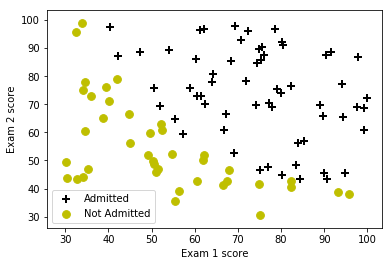

In [13]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not Admitted')

In [14]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [15]:
def costFunction(theta, x, y):
    m =y.size
    h = sigmoid(x.dot(theta))
    
    J= -1.0*(1.0/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    
    if np.isnan(J[0]):
        return np.inf
    return J[0]

In [16]:
def gradient(theta, x ,y):
    m = y.size
    h = sigmoid(x.dot(theta.reshape(-1,1)))
    
    grad = (1.0/m)*x.T.dot(h-y)
    
    return grad.flatten()

In [22]:
initial_theta = np.zeros(x.shape[1])
cost = costFunction(initial_theta, x, y)
grad = gradient(initial_theta, x, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.69314718056
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


In [24]:
res = minimize(costFunction, initial_theta, args=(x,y), method = None, jac=gradient, options={'maxiter':1000})
res

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


      fun: 0.20349770158950992
 hess_inv: array([[  2.85339493e+03,  -2.32908823e+01,  -2.27416470e+01],
       [ -2.32908823e+01,   2.04489131e-01,   1.72969525e-01],
       [ -2.27416470e+01,   1.72969525e-01,   1.96170322e-01]])
      jac: array([ -2.68557640e-09,   4.36433474e-07,  -1.39671758e-06])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 25
     njev: 29
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

In [30]:
def predict(theta, x, threshold=0.5):
    p= sigmoid(x.dot(theta.T)) >= threshold
    return p.astype('int')

In [31]:
sigmoid(np.array([1,45,85]).dot(res.x.T))

0.77629032493310146

In [32]:
p = predict(res.x, x)
print('Train accuracy {} %'.format(100*sum(p==y.ravel())/p.size))

Train accuracy 89 %


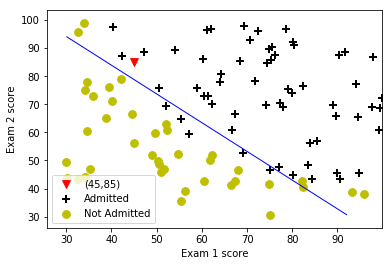

In [42]:
plt.scatter(45,85, s=60, c='r', marker='v', label='(45,85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not Admitted')
x1_min, x1_max = x[:,1].min(), x[:,1].max()
x2_min, x2_max = x[:,2].min(), x[:,2].max()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1,xx2,h,[0.5], linewidths=1, colors='b')

In [44]:
data2 = loaddata('./data/ex2data2.txt',',')

('Dimensions: ', (118, 3))
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


In [59]:
x = data2[:,0:2]
y = np.c_[data[:,2]]


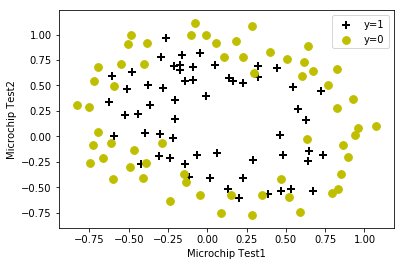

In [60]:
plotData(data2, 'Microchip Test1', 'Microchip Test2', 'y=1', 'y=0')

In [73]:
poly = PolynomialFeatures(6)
xx = poly.fit_transform(data2[:,0:2])
xx.shape

(118, 28)

In [67]:
def costFunctionReg(theta, reg, *args):
    m = y.size
    h = sigmoid(x.dot(theta))
    
    J = -1.0*(1.0/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return np.inf
    return J[0]

In [71]:
def gradientReg(theta, reg, *args):
    m =y.size
    h = sigmoid(x.dot(theta.reshape(-1,1)))
    
    grad = (1.0/m)*x.T.dot(h-y) + (reg/m)*np.r_[[[0]], theta[1:].reshape(-1,1)]
    
    return grad.flatten()

In [75]:
inital_theta = np.zeros(x.shape[1])
costFunctionReg(initial_theta, 1, x, y)

ValueError: shapes (118,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)